https://pytorch.org/vision/stable/transforms.html

*Note: Developed under local Jupyter Notebook (Windows)*

In [1]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

### Load image

In [2]:
# Download image from url in jupyter notebook(windows),  pip install wget first
!python -m wget https://upload.wikimedia.org/wikipedia/commons/b/b2/Hausziege_04.jpg


Saved under Hausziege_04 (1).jpg


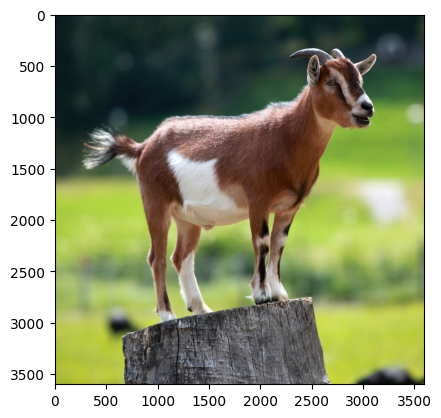

In [3]:
img = Image.open('Hausziege_04.jpg')
plt.imshow(img)

### Resize

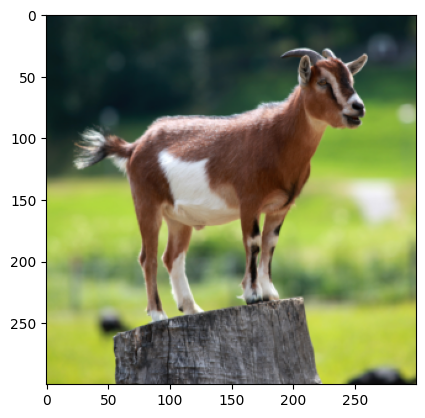

In [4]:
resized_img = transforms.Resize((300, 300))(img)
plt.imshow(resized_img)

### Random Rotation

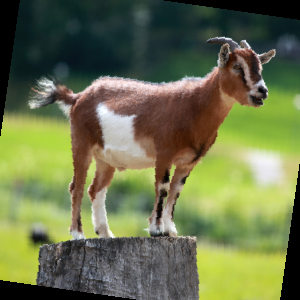

In [5]:
random_rot_img = transforms.RandomRotation(30)(resized_img)
# plt.imshow(random_rot_img)
random_rot_img

### Center Crop

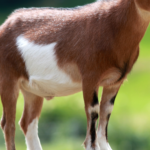

In [6]:
center_crop_img = transforms.CenterCrop(150)(resized_img)
# plt.imshow(center_crop_img)
center_crop_img

### Grayscale

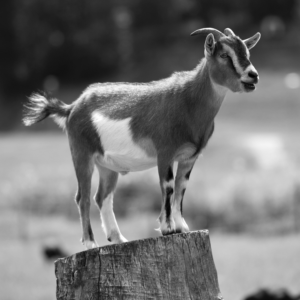

In [7]:
grayscale_img = transforms.Grayscale()(resized_img)
# plt.imshow(grayscale_img)
grayscale_img

### Padding

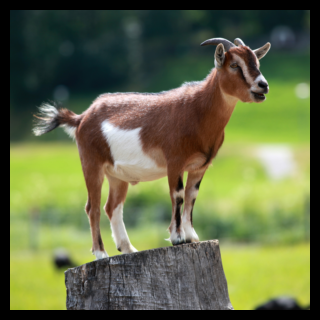

In [8]:
# Padding default color
pad_1_img = transforms.Pad(10)(resized_img)
pad_1_img

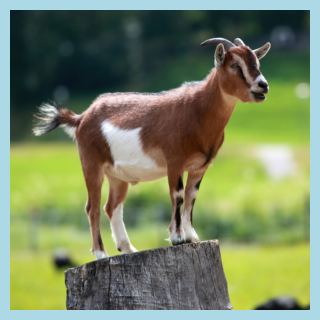

In [9]:
# Change padding color
pad_2_img = transforms.Pad(10, fill=(173,216,230))(resized_img)
pad_2_img

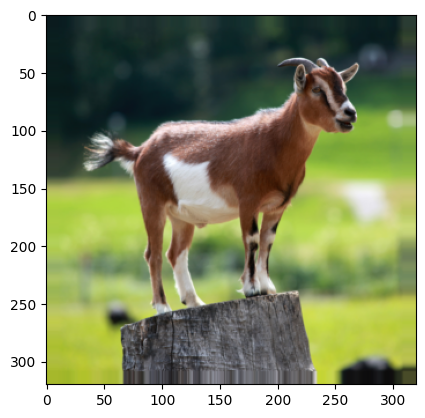

In [10]:
# edge: pads with the last value at the edge of the image
pad_3_img = transforms.Pad(10, padding_mode='edge')(resized_img)
plt.imshow(pad_3_img)

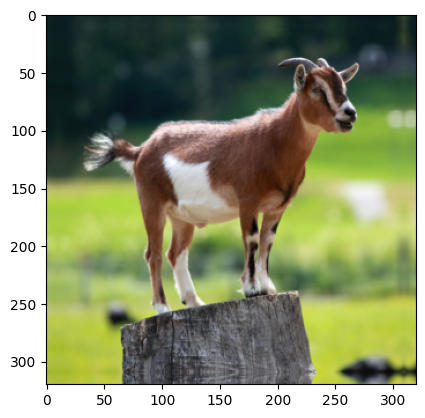

In [11]:
# Padding with reflect/mirror value from every edge, without repeating the last value on the edge
pad_4_img = transforms.Pad(10, padding_mode='reflect')(resized_img)
plt.imshow(pad_4_img)

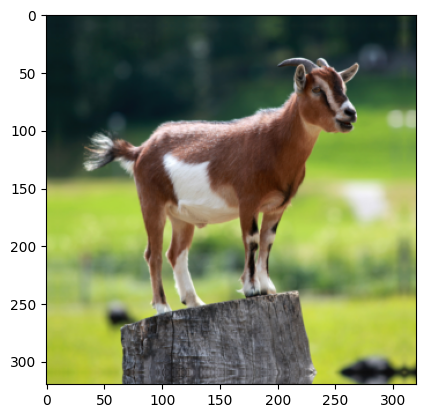

In [12]:
# Padding with reflect/mirror value from every edge, with reflection of image repeating the last value on the edge
pad_5_img = transforms.Pad(10, padding_mode='symmetric')(resized_img)
plt.imshow(pad_5_img)

## Multiple processings

In [13]:
multi_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomResizedCrop(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [14]:
x = multi_transform(resized_img)
x

tensor([[[-1.7240, -1.7240, -1.7069,  ..., -1.8953, -1.9124, -1.9638],
         [-1.7412, -1.7240, -1.7240,  ..., -1.9124, -1.9295, -1.9295],
         [-1.7754, -1.7412, -1.7240,  ..., -1.9467, -1.9467, -1.9638],
         ...,
         [ 1.3242,  1.3413,  1.3584,  ...,  1.5982,  1.6153,  1.6324],
         [ 1.3413,  1.3584,  1.3584,  ...,  1.5810,  1.6153,  1.5982],
         [ 1.3413,  1.3584,  1.3755,  ...,  1.5639,  1.5982,  1.5810]],

        [[-1.2479, -1.2479, -1.2129,  ..., -1.4230, -1.4405, -1.4755],
         [-1.2829, -1.2479, -1.2129,  ..., -1.4405, -1.4405, -1.4755],
         [-1.3179, -1.2654, -1.2304,  ..., -1.4580, -1.4755, -1.4755],
         ...,
         [ 1.8158,  1.8508,  1.8859,  ...,  2.0084,  2.0084,  2.0084],
         [ 1.8333,  1.8508,  1.8859,  ...,  2.0259,  2.0259,  2.0259],
         [ 1.8508,  1.8683,  1.8859,  ...,  2.0259,  2.0259,  2.0259]],

        [[-1.0550, -1.0550, -1.0201,  ..., -1.1944, -1.2119, -1.1944],
         [-1.0724, -1.0550, -1.0376,  ..., -1